<a href="https://colab.research.google.com/github/NhatHuy2k2/AI/blob/main/Week9_non_bin_output_ImageRegcognition_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
import matplotlib.pyplot as plt

In [57]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print(x_train.shape)
#print(x_test.shape)
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

(32, 32, 3)
Hinh nay la:  [4]


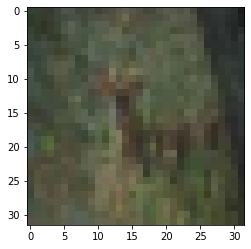

In [8]:
Hinh = x_train[10]
print(Hinh.shape)
plt.imshow(Hinh,cmap = plt.cm.binary)
plt.show
print("Hinh nay la: ", y_train[10])

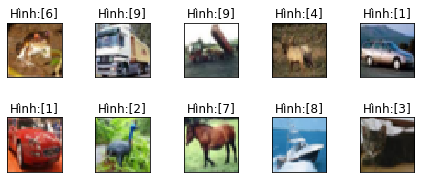

In [5]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('Hình:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
  #0 -> Airplane
  #1 -> Car
  #2 -> Bird
  #3 -> Cat
  #4 -> Deer
  #5 -> Dog
  #6 -> Frog
  #7 -> Horse
  #8 -> Ship
  #9 -> Truck

In [49]:
model = Sequential()
model.add(Dense(512,activation = "relu", input_shape = (32*32*3,),name = 'layer1'))
model.add(Dense(256,activation = "relu",name = 'layer2'))
model.add(Dense(128,activation = "relu",name = 'layer3'))
model.add(Dense(10, activation = "softmax",name = 'layer4'))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f297c486ac0>>

In [59]:
x_train = x_train.reshape((50000, 32*32*3)) #chỉnh lại kích thước của dữ liệu đầu vào

x_train = x_train.astype('float32')/255 #astype qua float để thực hiện phép chia
#print(x_train)

[[0.00090734 0.00095348 0.00096886 ... 0.00189158 0.00141484 0.00110727]
 [0.00236832 0.00272203 0.00287582 ... 0.00219915 0.00204537 0.00221453]
 [0.00392157 0.00392157 0.00392157 ... 0.0012303  0.00132257 0.00129181]
 ...
 [0.00053825 0.00273741 0.00361399 ... 0.00018454 0.00047674 0.00076894]
 [0.00290657 0.00324491 0.00369089 ... 0.00299885 0.00292195 0.00262976]
 [0.00352172 0.00352172 0.00367551 ... 0.00250673 0.00250673 0.00247597]]


In [51]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [52]:
from keras.utils import to_categorical #chuyển thành one hot encoding
train_labels = to_categorical(y_train,10)#chuyển thành 10 bit one hot encoding
test_labels =to_categorical(y_test,10)
print(test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [53]:
print(x_train.shape)
print(x_train.shape)

(50000, 3072)
(50000, 3072)


In [54]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, test_labels)
print('test_accuracy: ', test_acc)
print('test_loss: ', test_loss)

Epoch 1/10
391/391 [==============================] - 10s 23ms/step - loss: 2.1827 - accuracy: 0.1647
Epoch 2/10
391/391 [==============================] - 9s 23ms/step - loss: 1.9821 - accuracy: 0.2587
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 1.9040 - accuracy: 0.2993
Epoch 4/10
391/391 [==============================] - 8s 21ms/step - loss: 1.8286 - accuracy: 0.3366
Epoch 5/10
391/391 [==============================] - 9s 23ms/step - loss: 1.7622 - accuracy: 0.3596
Epoch 6/10
391/391 [==============================] - 10s 27ms/step - loss: 1.7117 - accuracy: 0.3792
Epoch 7/10
391/391 [==============================] - 10s 24ms/step - loss: 1.6738 - accuracy: 0.3956
Epoch 8/10
391/391 [==============================] - 8s 21ms/step - loss: 1.6371 - accuracy: 0.4093
Epoch 9/10
391/391 [==============================] - 9s 23ms/step - loss: 1.6065 - accuracy: 0.4218
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 1.5585 - acc